In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import warnings

In [6]:
df = pd.read_parquet('/content/drive/MyDrive/ecommerce/2019-Oct.parquet')

In [7]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [8]:
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_convert('Europe/Samara')

In [9]:
df['event_type'] = df['event_type'].astype('category')
df['category_code'] = df['category_code'].astype('category')

In [10]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype                        
---  ------         -----                        
 0   event_time     datetime64[ns, Europe/Samara]
 1   event_type     category                     
 2   product_id     int64                        
 3   category_id    int64                        
 4   category_code  category                     
 5   brand          object                       
 6   price          float64                      
 7   user_id        int64                        
 8   user_session   object                       
dtypes: category(2), datetime64[ns, Europe/Samara](1), float64(1), int64(3), object(2)
memory usage: 2.3+ GB


In [12]:
print(df.loc[df['event_time'] == '2019-10-02 00:00:00+04:00'])

                       event_time event_type  product_id          category_id  \
1196365 2019-10-02 00:00:00+04:00       view     1200947  2172371436436455782   
1196366 2019-10-02 00:00:00+04:00       view     6200670  2053013552293216471   
1196367 2019-10-02 00:00:00+04:00       view     1004659  2053013555631882655   
1196368 2019-10-02 00:00:00+04:00       view    13400451  2053013557066334713   
1196369 2019-10-02 00:00:00+04:00       view     2601131  2053013563970159485   
1196370 2019-10-02 00:00:00+04:00       view    12703494  2053013553559896355   
1196371 2019-10-02 00:00:00+04:00       view     1004443  2053013555631882655   

                             category_code     brand   price    user_id  \
1196365                 electronics.tablet   samsung  115.32  555774146   
1196366  appliances.environment.air_heater    luxell   39.37  516364071   
1196367             electronics.smartphone   samsung  731.04  552422240   
1196368                                NaN        s

In [13]:
print(df.loc[df['event_time'] == '2019-11-01 00:00+04:00'])

                        event_time event_type  product_id  \
42398930 2019-11-01 00:00:00+04:00       view     1005134   
42398931 2019-11-01 00:00:00+04:00       view    10800179   
42398932 2019-11-01 00:00:00+04:00       view     3701164   
42398933 2019-11-01 00:00:00+04:00       view     7005060   
42398934 2019-11-01 00:00:00+04:00       view     1005161   
42398935 2019-11-01 00:00:00+04:00       view     7600336   
42398936 2019-11-01 00:00:00+04:00       view     1004739   
42398937 2019-11-01 00:00:00+04:00       view    30100023   
42398938 2019-11-01 00:00:00+04:00       view    11500238   
42398939 2019-11-01 00:00:00+04:00       view     1004781   

                  category_id                  category_code     brand  \
42398930  2053013555631882655         electronics.smartphone     apple   
42398931  2053013554994348409                            NaN   redmond   
42398932  2053013565983425517  appliances.environment.vacuum     bosch   
42398933  2053013560346280633   

In [14]:
df1 = df.loc[1196365:42398929]
df1 = df1.reset_index(drop = True)

df1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-02 00:00:00+04:00,view,1200947,2172371436436455782,electronics.tablet,samsung,115.32,555774146,6a3d8d91-853c-4ec5-a8d1-5cdc9ce4943e
1,2019-10-02 00:00:00+04:00,view,6200670,2053013552293216471,appliances.environment.air_heater,luxell,39.37,516364071,4400073a-fd0b-4339-aa5e-2a7c26591b09
2,2019-10-02 00:00:00+04:00,view,1004659,2053013555631882655,electronics.smartphone,samsung,731.04,552422240,5db37277-33a2-4a11-b83c-b4314c1ea657
3,2019-10-02 00:00:00+04:00,view,13400451,2053013557066334713,NaN,sv,218.54,543395231,87c32070-2d94-46fd-af66-48becf6b6b9c
4,2019-10-02 00:00:00+04:00,view,2601131,2053013563970159485,NaN,gefest,290.61,517129744,51526f9a-c2f5-496b-a341-29760cc3dc45
...,...,...,...,...,...,...,...,...,...
41202560,2019-10-31 23:59:59+04:00,view,12718908,2053013553559896355,NaN,yokohama,96.27,536689953,0a77064e-0bc6-4745-b703-5e8208bf8f6e
41202561,2019-10-31 23:59:59+04:00,view,28719204,2053013565639492569,apparel.shoes,alpina,220.08,534245704,699164ab-a8f6-4ce0-bd07-b059ff3e1db2
41202562,2019-10-31 23:59:59+04:00,view,1005217,2053013555631882655,electronics.smartphone,xiaomi,151.07,560095437,15e037ed-4f14-44ba-b7c0-0c033a6c3649
41202563,2019-10-31 23:59:59+04:00,view,1003892,2053013555631882655,electronics.smartphone,xiaomi,144.73,566243306,566c6d0a-2cd5-4248-ac7b-3af675c05fd3


In [15]:
daily_summary_table = df1.groupby(by=[df1['event_time'].dt.normalize()]).agg(Number_of_daily_visits = ('user_session', lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors = ('user_id', lambda x: x.nunique())
                                                                                  )
sales_filter = df1['event_type'] == 'purchase'
sales = df1.loc[sales_filter].groupby(by = [df1['event_time'].dt.normalize()]).agg(number_of_daily_sales = ('event_type','count'),
                                                                                      Total_daily_sales = ('price','sum')
                                                                                      ).reset_index()
daily_summary_table = pd.merge(left = daily_summary_table,
                          right = sales,
                          left_on = ['event_time'],
                          right_on = ['event_time'],
                          how = 'left')
daily_summary_table['conversion_rate'] = daily_summary_table['number_of_daily_sales'] / daily_summary_table['Number_of_daily_visits']

Daily Visits Statistics
--------------------------------------------------
count        30.000000
mean     300822.300000
std       25240.475594
min      241025.000000
25%      281584.750000
50%      302118.500000
75%      319019.500000
max      342353.000000
Name: Number_of_daily_visits, dtype: float64
--------------------------------------------------
Visit Statistics by Dates
--------------------------------------------------
            count       mean           std       min        25%       50%  \
event_time                                                                  
Friday        4.0  320825.50  16498.249574  299332.0  312183.25  324684.0   
Monday        4.0  294812.25  25887.233551  265055.0  278174.00  295802.0   
Saturday      4.0  297215.50  18718.177662  275898.0  286191.75  296755.5   
Sunday        4.0  311112.00  32736.038632  275383.0  287497.00  313356.0   
Thursday      5.0  282708.60  24554.064700  241025.0  281264.00  293653.0   
Tuesday       4.0  309373.25 

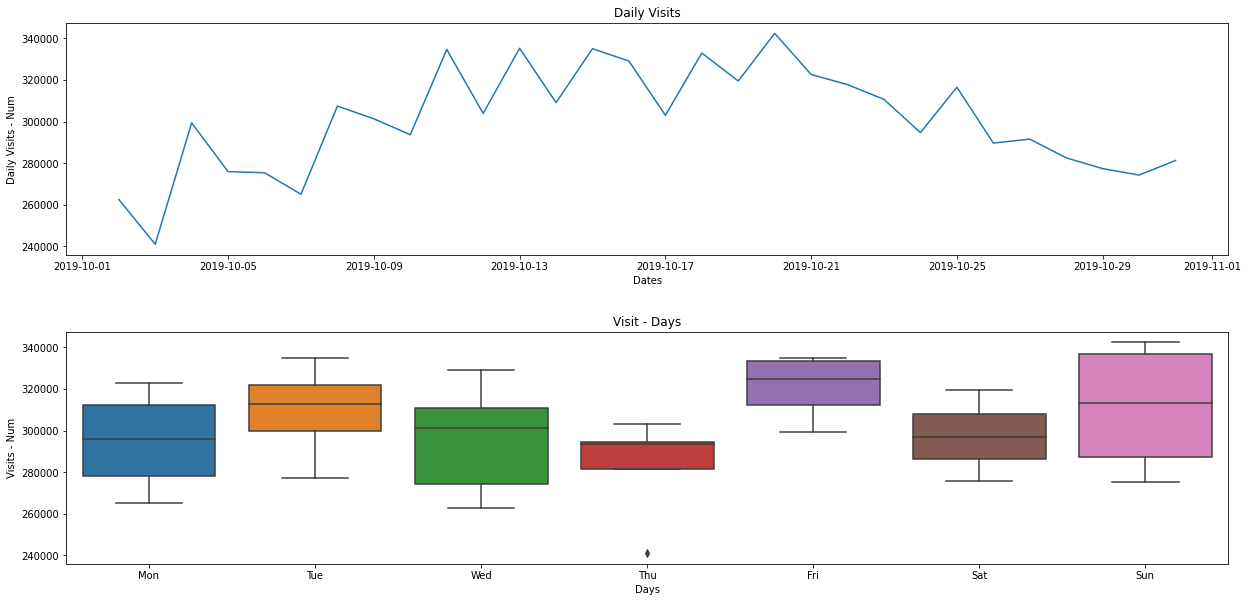

In [16]:
print('Daily Visits Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visits'].describe())
print('-'*50)
print('Visit Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by = daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visits'].describe())

fig = plt.figure(figsize = (18,9))
ax1 = fig.add_subplot(2,1,1)
sns.lineplot(x = 'event_time',
              y = 'Number_of_daily_visits',
              data = daily_summary_table,
             ax = ax1)
plt.title('Daily Visits')
plt.ylabel('Daily Visits - Num')
plt.xlabel('Dates')

ax2 = fig.add_subplot(2, 1, 2)

sns.boxplot(x = daily_summary_table['event_time'].dt.dayofweek,
            y = 'Number_of_daily_visits',
            data = daily_summary_table,
           ax=ax2)
plt.title('Visit - Days')
plt.ylabel('Visits - Num')
plt.xlabel('Days')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
fig.tight_layout(pad = 3.0);

Daily Visitor Statistics
--------------------------------------------------
count        30.000000
mean     209547.200000
std       16071.966634
min      170670.000000
25%      196828.750000
50%      208501.500000
75%      223499.250000
max      233158.000000
Name: Number_of_daily_visitors, dtype: float64
--------------------------------------------------
Visitor Statistics by Dates
--------------------------------------------------
            count       mean           std       min        25%       50%  \
event_time                                                                  
Friday        4.0  222462.25  10062.111454  208486.0  218644.00  225105.5   
Monday        4.0  204876.00  16509.524887  187897.0  194228.50  202940.0   
Saturday      4.0  205246.75   9550.793209  194065.0  200176.00  205093.5   
Sunday        4.0  214292.00  18761.210995  194593.0  200317.75  214708.5   
Thursday      5.0  197960.40  15774.737091  170670.0  198298.00  204637.0   
Tuesday       4.0  21714

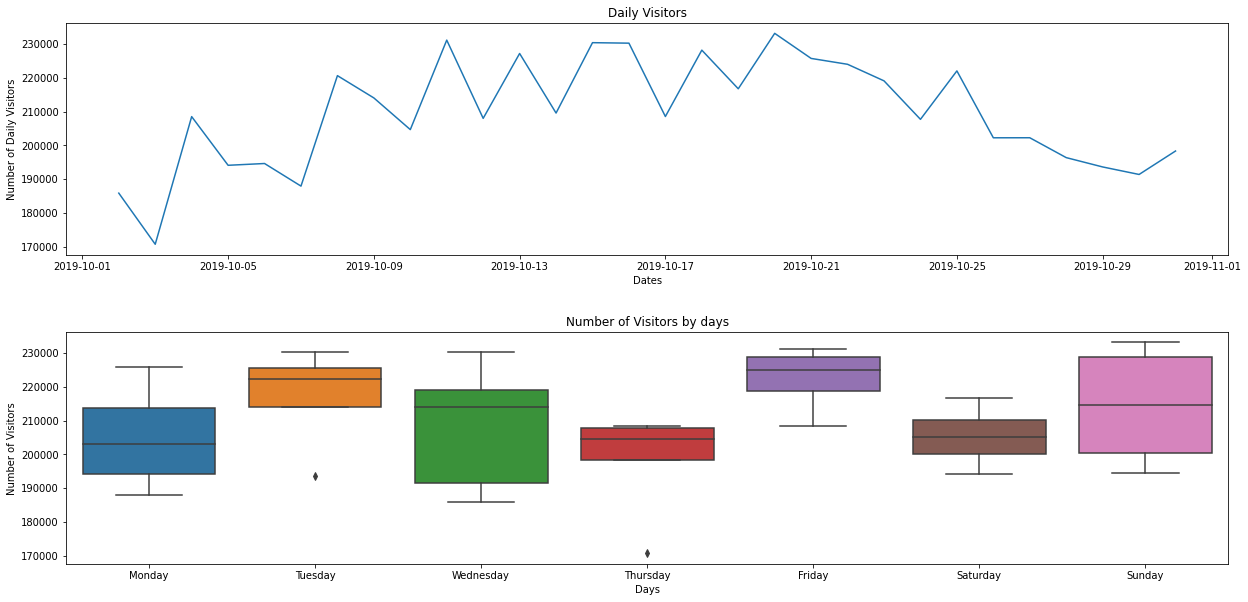

In [17]:
print('Daily Visitor Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visitors'].describe())
print('-'*50)
print('Visitor Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visitors'].describe())

fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visitors',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Visitors')
plt.ylabel('Number of Daily Visitors')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visitors',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visitors by days')
plt.ylabel('Number of Visitors')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

Conversion Rates Statistics
--------------------------------------------------
count    30.000000
mean      0.080074
std       0.006249
min       0.071698
25%       0.075434
50%       0.078478
75%       0.081361
max       0.095560
Name: conversion_rate, dtype: float64
--------------------------------------------------
Conversion Rates Statistics by Dates
--------------------------------------------------
            count      mean       std       min       25%       50%       75%  \
event_time                                                                      
Friday        4.0  0.080613  0.006485  0.075749  0.077432  0.078266  0.081446   
Monday        4.0  0.081622  0.007620  0.075025  0.077393  0.079487  0.083716   
Saturday      4.0  0.080805  0.004067  0.076891  0.077545  0.080691  0.083951   
Sunday        4.0  0.080845  0.005814  0.073570  0.078933  0.081009  0.082921   
Thursday      5.0  0.079865  0.008374  0.071698  0.074108  0.078946  0.081382   
Tuesday       4.0  0.0766

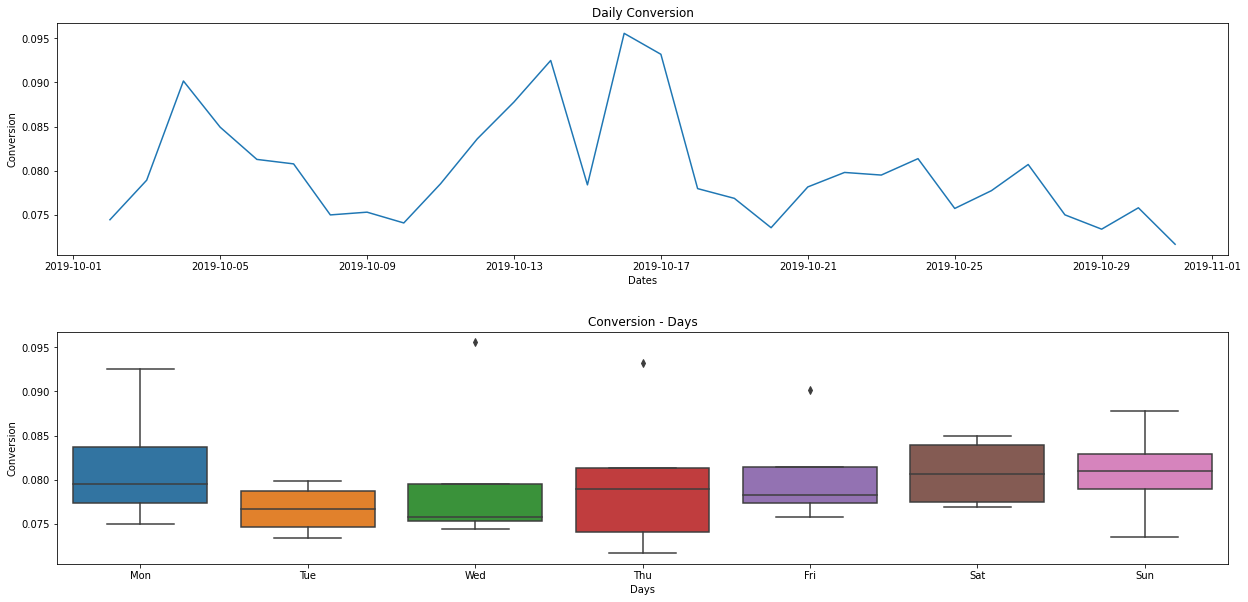

In [18]:
print('Conversion Rates Statistics')
print('-'*50)
print(daily_summary_table['conversion_rate'].describe())
print('-'*50)
print('Conversion Rates Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by = daily_summary_table['event_time'].dt.day_name())['conversion_rate'].describe())

fig = plt.figure(figsize = (18, 9))
ax1 = fig.add_subplot(2, 1, 1)
sns.lineplot(x = 'event_time',
              y = 'conversion_rate',
              data = daily_summary_table,
            ax = ax1)
plt.title('Daily Conversion')
plt.ylabel('Conversion')
plt.xlabel('Dates')

ax2 = fig.add_subplot(2, 1, 2)
sns.boxplot(x = daily_summary_table['event_time'].dt.dayofweek,
            y = 'conversion_rate',
            data = daily_summary_table,
           ax = ax2)
plt.title('Conversion - Days')
plt.ylabel('Conversion')
plt.xlabel('Days')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
fig.tight_layout(pad = 3.0);

In [19]:
df1['event_type'].unique()

['view', 'cart', 'purchase']
Categories (3, object): ['cart', 'purchase', 'view']

In [20]:
pur_df = df1.loc[df1['event_type'] == 'purchase']
pur_df = pur_df.reset_index(drop = True)
pur_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-02 00:00:02+04:00,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,253.16,534562370,65ec5f9b-4e28-48f7-8946-01d976bdf64b
1,2019-10-02 00:00:27+04:00,purchase,1005116,2053013555631882655,electronics.smartphone,apple,1052.79,552060163,c25914b7-71f6-4239-b70b-e9040a806aaa
2,2019-10-02 00:00:51+04:00,purchase,5900030,2053013560841208525,NaN,garmin,193.01,512814029,8556b72d-f0c0-4225-a46c-1adba30987b2
3,2019-10-02 00:00:53+04:00,purchase,12703015,2053013553559896355,NaN,cordiant,42.99,543346126,a4cc5e0d-4517-4eab-bea6-46a0d844af36
4,2019-10-02 00:01:03+04:00,purchase,26202988,2053013563693335403,NaN,None,417.66,515464820,8fa24882-d48f-4efc-9e31-e9e6932f591e
...,...,...,...,...,...,...,...,...,...
723494,2019-10-31 23:58:58+04:00,purchase,1307073,2053013558920217191,computers.notebook,acer,682.09,512699299,8855f925-d682-4a7d-8e31-c53ac872572d
723495,2019-10-31 23:58:59+04:00,purchase,12702944,2053013553559896355,NaN,cordiant,40.93,520178255,425e3105-8ecb-40d7-b4fa-8bcca2b29be2
723496,2019-10-31 23:59:09+04:00,purchase,21406799,2053013561579406073,electronics.clocks,tissot,741.33,565966895,b3a7e0f4-26a4-42e1-af6c-6ad9ab87636c
723497,2019-10-31 23:59:13+04:00,purchase,1002629,2053013555631882655,electronics.smartphone,apple,358.31,560894491,d07f97b6-9a1a-44b2-a164-7f08d7f99380


In [21]:
cart_df = df1.loc[df1['event_type'] == 'cart']
cart_df = cart_df.reset_index(drop = True)
cart_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-02 00:00:02+04:00,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.61,540566949,836b880a-8fb3-4da7-bd8f-65217b34b796
1,2019-10-02 00:00:25+04:00,cart,1005122,2053013555631882655,electronics.smartphone,apple,1027.05,541496006,ea576ca6-4cdc-4e45-ac61-694f45da5e1c
2,2019-10-02 00:00:31+04:00,cart,1002524,2053013555631882655,electronics.smartphone,apple,513.53,515451797,6cef168e-7216-4721-ae3f-a758aef34f95
3,2019-10-02 00:00:35+04:00,cart,1200947,2172371436436455782,electronics.tablet,samsung,115.32,555774146,6a3d8d91-853c-4ec5-a8d1-5cdc9ce4943e
4,2019-10-02 00:00:41+04:00,cart,1004661,2053013555631882655,electronics.smartphone,samsung,867.46,514707112,8fac76b2-64da-461e-b4e1-dd4c58fa94c0
...,...,...,...,...,...,...,...,...,...
909782,2019-10-31 23:59:04+04:00,cart,1005116,2053013555631882655,electronics.smartphone,apple,1013.86,515593637,334f0cb8-5959-4d02-8b91-a86d7847b3b5
909783,2019-10-31 23:59:17+04:00,cart,1004739,2053013555631882655,electronics.smartphone,xiaomi,203.09,525580183,62682abb-9c60-4d42-bb1a-b15fd8af0266
909784,2019-10-31 23:59:26+04:00,cart,4803191,2053013554658804075,electronics.audio.headphone,xiaomi,14.16,522267233,9bb12ccf-c3eb-4d5d-9e1f-edb59c390ce7
909785,2019-10-31 23:59:27+04:00,cart,4803191,2053013554658804075,electronics.audio.headphone,xiaomi,14.16,522267233,9bb12ccf-c3eb-4d5d-9e1f-edb59c390ce7


In [22]:
pur_n = pur_df['user_id'].nunique()
all_n = df1['user_id'].nunique()
print(pur_n)
print(all_n)
print((pur_n / all_n) * 100)

339774
2962411
11.469509126181343


In [23]:
pur_df['brand'].value_counts()

samsung        168442
apple          138785
xiaomi          55118
huawei          22825
lucente         11240
                ...  
synology            1
devos               1
brevi               1
feron               1
trendbeauty         1
Name: brand, Length: 1978, dtype: int64

In [24]:
cart_n = cart_df['user_id'].nunique()
print(cart_n)
print(all_n)
print((cart_n / all_n) * 100)

331967
2962411
11.20597378284107


In [25]:
cart_df['brand'].value_counts()

samsung    297330
apple      204258
xiaomi     102037
huawei      41147
oppo        20235
            ...  
mars            1
acqua           1
daye            1
rock            1
ricoh           1
Name: brand, Length: 582, dtype: int64

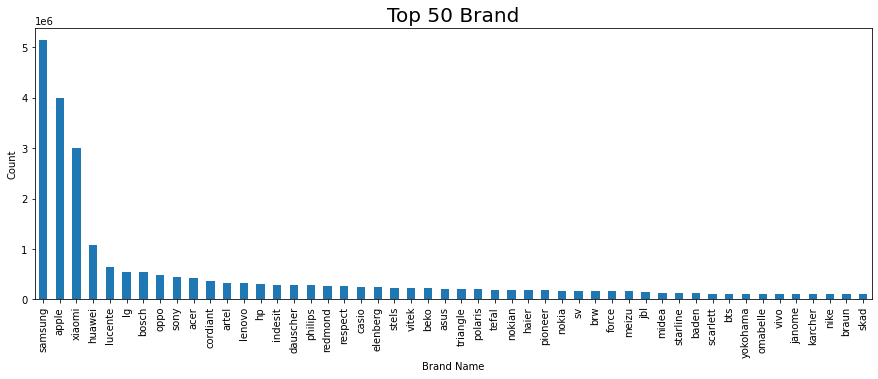

In [26]:
df1['brand'].value_counts().head(50).plot.bar(figsize = (15, 5))
plt.title('Top 50 Brand', fontsize = 20)
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.show()

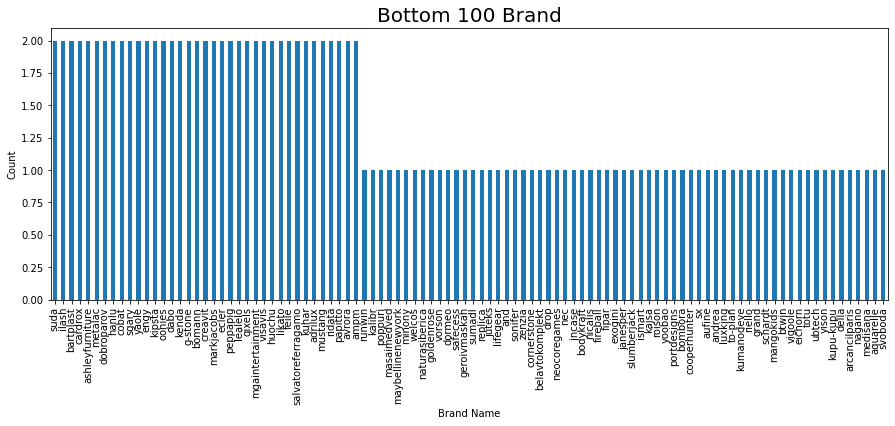

In [27]:
df1['brand'].value_counts().tail(100).plot.bar(figsize = (15, 5))
plt.title('Bottom 100 Brand', fontsize = 20)
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.show()

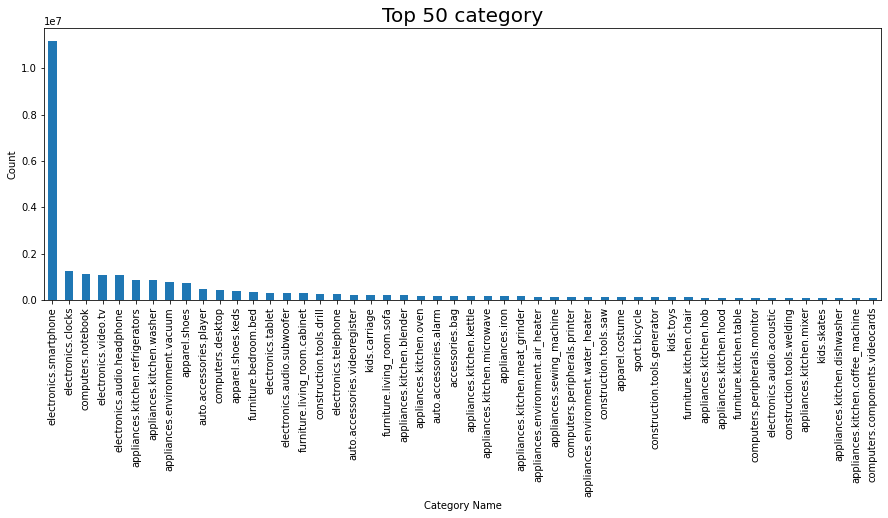

In [28]:
df1['category_code'].value_counts().head(50).plot.bar(figsize = (15, 5))
plt.title('Top 50 category', fontsize = 20)
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.show()

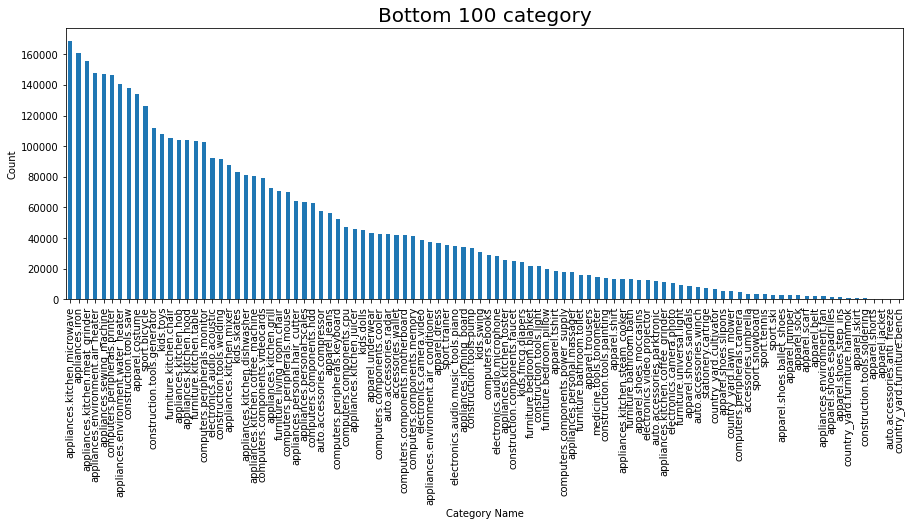

In [29]:
df1['category_code'].value_counts().tail(100).plot.bar(figsize = (15, 5))
plt.title('Bottom 100 category', fontsize = 20)
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.show()

In [30]:
df1['category_code'] = df1['category_code'].astype('string')

In [ ]:
df1.update(df1['category_code'].fillna('NaN.NaN'))

In [ ]:
df1['category_code'] = df1['category_code'].astype('category')

In [ ]:
df1['main_category'] = df1['category_code'].str.split('.', expand = True)[0].astype('category')

print(df1['main_category'].nunique())
df1['main_category'].value_counts()

In [ ]:
df1['sub_category'] = df1['category_code'].str.split('.', expand = True)[1].astype('category')

print(df1['sub_category'].nunique())
df1['sub_category'].value_counts()

In [ ]:
df1 = df1.drop(columns = ['category_code'])

In [ ]:
df1['brand'] = df1['brand'].astype('string')

In [ ]:
df1.update(df1['brand'].fillna('unknown'))

In [ ]:
df1['brand'] = df1['brand'].astype('category')

In [ ]:
df1 = df1.dropna()

In [ ]:
df1

In [ ]:
df1.isnull().sum().sum()

In [ ]:
df1['day'] = df1['event_time'].dt.day
df1['hour'] = df1['event_time'].dt.hour
df1['minute'] = df1['event_time'].dt.minute
df1['seconds'] = df1['event_time'].dt.second

In [ ]:
df1['purchased'] = np.where(df1['event_type'] == 'purchase' , 1, 0)

In [ ]:
df2 = df1.astype({'product_id' : 'category', 'category_id' : 'category', 'user_id' : 'category', 'user_session' : 'category'})

In [ ]:
# df3 = df2.drop(columns=['event_time'])

In [ ]:
df2.info()

In [ ]:
# df3.info()

일별 활성 사용자 수

In [ ]:
day_df = df2[['day', 'user_id']]

result = day_df.drop_duplicates()
group = result.groupby(['day']).size()
group

In [ ]:
#df2.to_parquet('2019-Oct-plus.parquet')

In [ ]:
# df2.to_csv('2019-Oct-plus.csv')

# 날짜 별 활성 사용자 사이트 체류 시간 구하기



```
day_n_df = ~~~ 이 부분에는 각 날짜 별로 데이터프레임 구축하는 부분 / 가운데 n의 경우에는 날짜를 적어두는걸 추천
type(day_n_df['event_time'][0]) -> 이 값이 pandas._libs-tslibs.timestamps.Timestamp 값이 나오면 그대로 진행 아니라면 타입을 datetime 로 변경

max_group = day_n_df.groupby(['useer_session', 'user_id'])['event_time'].max()
min_group = day_n_df.groupby(['useer_session', 'user_id'])['event_time'].min()

max_time_n_df = pd.DataFrame(max_group)
max_time_n_df.columns = ['latest_session']

min_time_n_df = pd.DataFrame(min_group)
min_time_n_df.columns = ['start_session']

n_df = pd.concat([max_time_n_df, min_time_n_df], axis = 1)

n_df['session_time'] = n_df['latest_session'] - n_df['start_session']
```



# Funnel 구하기

view -> cart -> purchase 단계로 가는 활성 사용자가 어떻게 되는지 알아보기 위한 코드로 날짜별로 진행해야합니다



```
day_n_df = ~~~ 이 부분 역시 위와 동일
fun_day_n_df = day_n_df[['event_time', 'event_type', 'user_session']]
그 이후 event_time column에 대한 datetime 확인 과정 그대로 진행

group = fun_day_n_df.groupby(['user_session', 'event_type'])['event_time'].min()

funnel_root = pd.DataFrame({'root' : [0, 1, 2]}, index = ['view', 'cart', 'purchase'])

group = pd.DataFrame(group).merge(funnel_root, left_on = 'event_type', right_index = True)

funnel = group.reset_index().pivot(index = 'user_session', columns = 'root', values = 'event_time')
funnel.columns = funnel_root.index

funnel_values = [funnel[column].notnull().sum() for column in funnel.columns]

funnel_values
```



# Funnel 시각화



```
import potly.express as px

data = dict(number = funnel_values, stage = ['view', 'cart', 'purchase'])
fig = px.funnel(data, x = number, y = 'stage')
fig.show()
```

